In [1]:
import numpy as np
from natsort import natsorted
from glob import glob
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt


In [2]:
LIEU = 'sebastian_laptop'

if LIEU=='sebastian_insel':
    root_exp  = '/home/sebastian/experiments/fedem/'
    root_data = '/media/sebastian/data/ASAP/BRATS_2019_ubelix/center_wise/'
    brats_nifti__dir_paths = natsorted(glob(root_data+"**/**/"))

if LIEU=='sebastian_laptop':
    root_exp  = '/Users/sebastianotalora/work/postdoc/federated_learning/fedem/'
    root_data = '/Users/sebastianotalora/work/postdoc/federated_learning/data/'
    brats_nifti__dir_paths = natsorted(glob(root_data+'brats/'"**/**/"))
len(brats_nifti__dir_paths)#Should be 259

259

In [3]:
BraTS19_2013_embeddings   = np.load(root_exp+'data/partitions/embeddings/'+'training_embeddings_center_'+str(0)+'.npy')
BraTS19_CBICA_embeddings  = np.load(root_exp+'data/partitions/embeddings/'+'training_embeddings_center_'+str(1)+'.npy')
BraTS19_TCIA01_embeddings = np.load(root_exp+'data/partitions/embeddings/'+'training_embeddings_center_'+str(2)+'.npy')
BraTS19_TMC_embeddings    = np.load(root_exp+'data/partitions/embeddings/'+'training_embeddings_center_'+str(3)+'.npy')

In [4]:
print(BraTS19_2013_embeddings.shape, BraTS19_CBICA_embeddings.shape, BraTS19_TCIA01_embeddings.shape, BraTS19_TMC_embeddings.shape)

(14, 72, 1024) (90, 72, 1024) (71, 72, 1024) (5, 72, 1024)


In [10]:
def centroids_from_embeddings(embeddings):
    volumes_centroids = []
    for cur_sample in range(embeddings.shape[0]): #looping through all the volumes
        #kmeans = KMeans(n_clusters=2, random_state=0).fit(embeddings[cur_sample,:,:])
        #volumes_centroids.append(np.concatenate((kmeans.cluster_centers_[0],kmeans.cluster_centers_[1]), axis=0))
        #volumes_centroids.append(kmeans.cluster_centers_[1])
        volumes_centroids.append(np.mean(embeddings[0],axis=0))
    return np.array(volumes_centroids).squeeze()

In [11]:
BraTS19_2013_centroids   = centroids_from_embeddings(BraTS19_2013_embeddings)
BraTS19_CBICA_centroids  = centroids_from_embeddings(BraTS19_CBICA_embeddings)
BraTS19_TCIA01_centroids = centroids_from_embeddings(BraTS19_TCIA01_embeddings)
BraTS19_TMC_centroids    = centroids_from_embeddings(BraTS19_TMC_embeddings)

In [12]:
print(BraTS19_2013_centroids.shape,BraTS19_CBICA_centroids.shape,BraTS19_TCIA01_centroids.shape,BraTS19_TMC_centroids.shape)

(14, 1024) (90, 1024) (71, 1024) (5, 1024)


In [13]:
reducer = umap.UMAP()

In [18]:
#scaled_sample_data = StandardScaler().fit_transform(np.concatenate((BraTS19_TCIA01_centroids, BraTS19_CBICA_centroids),axis=0))

scaled_sample_data = StandardScaler().fit_transform(np.concatenate((BraTS19_2013_centroids, BraTS19_CBICA_centroids, BraTS19_TCIA01_centroids, BraTS19_TMC_centroids),axis=0))
#scaled_sample_data = StandardScaler().fit_transform(np.concatenate((BraTS19_2013_centroids, BraTS19_TCIA01_centroids),axis=0))



embedding = reducer.fit_transform(scaled_sample_data)

#embedding = reducer.fit_transform(np.concatenate((BraTS19_2013_centroids, BraTS19_CBICA_centroids),axis=0))

embedding.shape

(180, 2)

In [19]:
color_points = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]
color_points = color_points*BraTS19_2013_centroids.shape[0]

color_points2 = [(0.1, 0.8, 0.8)]
color_points2 = color_points2*BraTS19_CBICA_centroids.shape[0]

color_points3 = [(0.9, 0.2, 0.2)]
color_points3 = color_points3*BraTS19_TCIA01_centroids.shape[0]


color_points4 = [(0.3333333333333333, 0.3, 0.3)]
color_points4  = color_points4*BraTS19_TMC_centroids.shape[0]


all_colors = color_points+color_points2 + color_points3 + color_points4

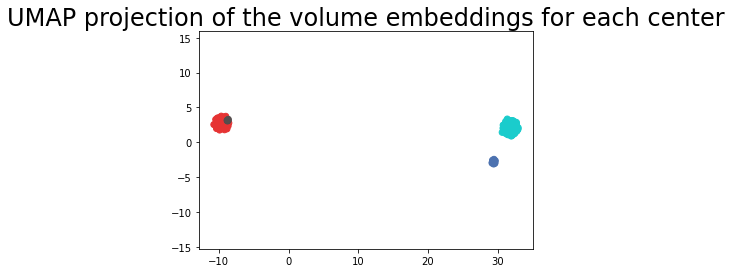

In [20]:
plt.scatter(
    embedding[0:len(all_colors), 0],
    embedding[0:len(all_colors), 1],
    c=all_colors)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the volume embeddings for each center', fontsize=24)
plt.savefig('embeddings.svg')


In [17]:
!pwd

/Users/sebastianotalora/work/postdoc/federated_learning/fedem
